<a href="https://colab.research.google.com/github/arpitsharma27/PythonPractice/blob/main/UniversityOf_Michigan_InferentialStatistical_Week2_LabExercises.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Statistical Inference with Confidence Intervals

Throughout week 2, we have explored the concept of confidence intervals, how to calculate them, interpret them, and what confidence really means.  

In this tutorial, we're going to review how to calculate confidence intervals of population proportions and means.

To begin, let's go over some of the material from this week and why confidence intervals are useful tools when deriving insights from data.

### Why Confidence Intervals?

Confidence intervals are a calculated range or boundary around a parameter or a statistic that is supported mathematically with a certain level of confidence.  For example, in the lecture, we estimated, with 95% confidence, that the population proportion of parents with a toddler that use a car seat for all travel with their toddler was somewhere between 82.2% and 87.7%.

This is *__different__* than having a 95% probability that the true population proportion is within our confidence interval.

Essentially, if we were to repeat this process, 95% of our calculated confidence intervals would contain the true proportion.

### How are Confidence Intervals Calculated?

Our equation for calculating confidence intervals is as follows:

$$Best\ Estimate \pm Margin\ of\ Error$$

Where the *Best Estimate* is the **observed population proportion or mean** and the *Margin of Error* is the **t-multiplier**.

The t-multiplier is calculated based on the degrees of freedom and desired confidence level.  For samples with more than 30 observations and a confidence level of 95%, the t-multiplier is 1.96

The equation to create a 95% confidence interval can also be shown as:

$$Population\ Proportion\ or\ Mean\ \pm (t-multiplier *\ Standard\ Error)$$

Lastly, the Standard Error is calculated differenly for population proportion and mean:

$$Standard\ Error \ for\ Population\ Proportion = \sqrt{\frac{Population\ Proportion * (1 - Population\ Proportion)}{Number\ Of\ Observations}}$$

$$Standard\ Error \ for\ Mean = \frac{Standard\ Deviation}{\sqrt{Number\ Of\ Observations}}$$

Let's replicate the car seat example from lecture:

In [1]:
import numpy as np

In [3]:
tstar=1.96
p=0.85
n=659

se=np.sqrt((p*(1-p))/n)
se

0.01390952774409444

In [5]:
lcb=p-tstar *se
ucb=p+tstar*se
(lcb,ucb)

(0.8227373256215749, 0.8772626743784251)

In [6]:
import statsmodels.api as sm

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [7]:
sm.stats.proportion_confint(n*p,n)

(0.8227378265796143, 0.8772621734203857)

In [9]:
import pandas as pd

url="https://raw.githubusercontent.com/arpitsharma27/PythonPractice/main/Coursera_Cartwheeldata.csv"
df=pd.read_csv(url)

In [10]:
df.head()

,ID,Age,Gender,GenderGroup,Glasses,GlassesGroup,Height,Wingspan,CWDistance,Complete,CompleteGroup,Score
0,1,56,F,1,Y,1,62.0,61.0,79,Y,1,7
1,2,26,F,1,Y,1,62.0,60.0,70,Y,1,8
2,3,33,F,1,Y,1,66.0,64.0,85,Y,1,7
3,4,39,F,1,N,0,64.0,63.0,87,Y,1,10
4,5,27,M,2,N,0,73.0,75.0,72,N,0,4


In [13]:
mean=df["CWDistance"].mean()
sd=df["CWDistance"].std()
n=len(df)

print(mean)
print(sd)
print(n)

82.48
15.058552387264855
25


In [14]:
tstar=2.064
se=sd/np.sqrt(n)
se

3.0117104774529713

In [15]:
lcb= mean-tstar*se
ucb=mean+tstar*se
(lcb,ucb)

(76.26382957453707, 88.69617042546294)

In [16]:
sm.stats.DescrStatsW(df["CWDistance"]).zconfint_mean()

(76.57715593233024, 88.38284406766977)

# Confidence Intervals


This tutorial is going to demonstrate how to load data, clean/manipulate a dataset, and construct a confidence interval for the difference between two population proportions and means.

We will use the 2015-2016 wave of the NHANES data for our analysis.

*Note: We have provided a notebook that includes more analysis, with examples of confidence intervals for one population proportions and means, in addition to the analysis I will show you in this tutorial.  I highly recommend checking it out!

For our population proportions, we will analyze the difference of proportion between female and male smokers.  The column that specifies smoker and non-smoker is "SMQ020" in our dataset.

For our population means, we will analyze the difference of mean of body mass index within our female and male populations.  The column that includes the body mass index value is "BMXBMI".

Additionally, the gender is specified in the column "RIAGENDR".

In [19]:
import pandas as pd
import numpy as np
import matplotlib
matplotlib.use('Agg')
import seaborn as sns
%matplotlib inline
import matplotlib.pyplot as plt
import statsmodels.api as sm

In [20]:
url="https://raw.githubusercontent.com/arpitsharma27/PythonPractice/main/Coursera_nhanes_2015_2016.csv"
da=pd.read_csv(url)

## **Investigating and Cleaning Data**

In [23]:
#Recode SMQ020 from 1/2 to Yes/No into new variable SMQ020x
da["SMQ020x"]=da.SMQ020.replace({1:'Yes', 2:'No', 7:np.nan, 9:np.nan})
da["SMQ020x"]

0       Yes
1       Yes
2       Yes
3        No
4        No
       ... 
5730    Yes
5731     No
5732    Yes
5733    Yes
5734     No
Name: SMQ020x, Length: 5735, dtype: object

In [24]:
da.SMQ020x.value_counts()

No     3406
Yes    2319
Name: SMQ020x, dtype: int64

In [26]:
#Recode RIAGENDR from 1/2 to Male/Female into new variable RIAGENDRx
da["RIAGENDRx"]=da.RIAGENDR.replace({1:'Male',2:'Female'})
da["RIAGENDRx"]

0         Male
1         Male
2         Male
3       Female
4       Female
         ...  
5730    Female
5731      Male
5732    Female
5733      Male
5734    Female
Name: RIAGENDRx, Length: 5735, dtype: object

In [27]:
da.RIAGENDRx.value_counts()

Female    2976
Male      2759
Name: RIAGENDRx, dtype: int64

In [28]:
dx=da[["SMQ020x","RIAGENDRx"]].dropna()
pd.crosstab(dx.SMQ020x,dx.RIAGENDRx)

RIAGENDRx,Female,Male
SMQ020x,,
No,2066,1340
Yes,906,1413


In [29]:
#Recode SMQ020x from Yes/No to 1/0 into existing variable SMQ020x
dx["SMQ020x"] = dx.SMQ020x.replace({"Yes":1, "No":2})

In [30]:
dz=dx.groupby("RIAGENDRx").agg({"SMQ020x": [np.mean, np.size]})
dz.columns = ["Proportion", "Total n"]
dz

,Proportion,Total n
RIAGENDRx,,
Female,1.695155,2972
Male,1.486742,2753


### Constructing Confidence Intervals

Now that we have the population proportions of male and female smokers, we can begin to calculate confidence intervals.  From lecture, we know that the equation is as follows:

$$Best\ Estimate \pm Margin\ of\ Error$$

Where the *Best Estimate* is the **observed population proportion or mean** from the sample and the *Margin of Error* is the **t-multiplier**.

The equation to create a 95% confidence interval can also be shown as:

$$Population\ Proportion\ or\ Mean\ \pm (t-multiplier *\ Standard\ Error)$$

The Standard Error (SE) is calculated differenly for population proportion and mean:

$$Standard\ Error \ for\ Population\ Proportion = \sqrt{\frac{Population\ Proportion * (1 - Population\ Proportion)}{Number\ Of\ Observations}}$$

$$Standard\ Error \ for\ Mean = \frac{Standard\ Deviation}{\sqrt{Number\ Of\ Observations}}$$

Lastly, the standard error for difference of population proportions and means is:

$$Standard\ Error\ for\ Difference\ of\ Two\ Population\ Proportions\ Or\ Means = \sqrt{(SE_{\ 1})^2 + (SE_{\ 2})^2}$$

#### Difference of Two Population Proportions

In [31]:
p=0.304845
n = 2972
se_female = np.sqrt(p*(1-p)/n)
se_female

0.00844415041930423

In [32]:
p=0.513258
n=2753
se_male=np.sqrt(p*(1-p)/n)
se_male

0.009526078787008965

In [33]:
se_diff=np.sqrt((se_female)**2+(se_male)**2)
se_diff

0.012729880335656654

In [34]:
d=0.304845-0.513258
lcb=d-1.96*se_diff
ucb=d+1.96*se_diff
(lcb, ucb)

(-0.23336356545788706, -0.18346243454211297)

**Difference of Two Population Means**

In [35]:
da["BMXBMI"].head()

0    27.8
1    30.8
2    28.8
3    42.4
4    20.3
Name: BMXBMI, dtype: float64

In [36]:
da.groupby("RIAGENDRx").agg({"BMXBMI": [np.mean, np.std, np.size]})

BMXBMI                  
                mean       std    size
RIAGENDRx                             
Female     29.939946  7.753319  2976.0
Male       28.778072  6.252568  2759.0

In [37]:
sem_female=7.753319/np.sqrt(2976)
sem_male = 6.252568/np.sqrt(2759)
(sem_female, sem_male)

(0.14212523289878048, 0.11903716451870151)

In [38]:
sem_diff=np.sqrt(sem_female**2+sem_male**2)
sem_diff

0.18538993598139303

In [39]:
d=29.939946 - 28.778072

In [41]:
lcb=d-1.96 * sem_diff
ucb=d+1.96 * sem_diff
(lcb,ucb)

(0.798509725476467, 1.5252382745235278)

# Confidence intervals case study using NHANES data


This notebook demonstrates how to use Python and its statistical libraries to construct confidence intervals for proportions and means.  We will also cover some important points relating to the properties of confidence intervals, and discuss how to use and interpret confidence intervals in practice.  We will use the 2015-2016 wave of the [NHANES](https://www.cdc.gov/nchs/nhanes/index.htm) data for all the analyses below.

It is important to note that the NHANES data are a "complex survey".  The data are not an independent and representative sample from the target population.  Proper analysis of complex survey data should make use of additional information about the manner in which the data were collected.  Since complex survey analysis is a somewhat specialized topic, we ignore this aspect of the data here, and analyze the NHANES data as if it were an independent and identically distributed sample from a population.

The following module import statements and data reading statement are identical to what we have used previously in course 1.

In [42]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
import statsmodels.api as sm

In [43]:
url="https://raw.githubusercontent.com/arpitsharma27/PythonPractice/main/Coursera_nhanes_2015_2016.csv"

In [44]:
da=pd.read_csv(url)
da.head()

,SEQN,ALQ101,ALQ110,ALQ130,SMQ020,RIAGENDR,RIDAGEYR,RIDRETH1,DMDCITZN,DMDEDUC2,DMDMARTL,DMDHHSIZ,WTINT2YR,SDMVPSU,SDMVSTRA,INDFMPIR,BPXSY1,BPXDI1,BPXSY2,BPXDI2,BMXWT,BMXHT,BMXBMI,BMXLEG,BMXARML,BMXARMC,BMXWAIST,HIQ210
0,83732,1.0,NaN,1.0,1,1,62,3,1.0,5.0,1.0,2,134671.37,1,125,4.39,128.0,70.0,124.0,64.0,94.8,184.5,27.8,43.3,43.6,35.9,101.1,2.0
1,83733,1.0,NaN,6.0,1,1,53,3,2.0,3.0,3.0,1,24328.56,1,125,1.32,146.0,88.0,140.0,88.0,90.4,171.4,30.8,38.0,40.0,33.2,107.9,NaN
2,83734,1.0,NaN,NaN,1,1,78,3,1.0,3.0,1.0,2,12400.01,1,131,1.51,138.0,46.0,132.0,44.0,83.4,170.1,28.8,35.6,37.0,31.0,116.5,2.0
3,83735,2.0,1.0,1.0,2,2,56,3,1.0,5.0,6.0,1,102718.00,1,131,5.00,132.0,72.0,134.0,68.0,109.8,160.9,42.4,38.5,37.7,38.3,110.1,2.0
4,83736,2.0,1.0,1.0,2,2,42,4,1.0,4.0,3.0,5,17627.67,2,126,1.23,100.0,70.0,114.0,54.0,55.2,164.9,20.3,37.4,36.0,27.2,80.4,2.0


## Confidence intervals for one proportion

In this section, we demonstrate the construction of confidence intervals for the proportion of people who smoke.  The specific definition of "smoker" used here ([SMQ020](https://wwwn.cdc.gov/Nchs/Nhanes/2015-2016/SMQ_I.htm#SMQ020)) identifies a person as being a smoker if they self-report as having smoked 100 or more cigarettes in their lifetime.  It is more accurate to refer to this as a measure of "lifetime smoking" rather than "current smoking".  Recall that the definitions of these and other NHANES variables can be found using the NHANES code books, or by searching using the link below.

https://wwwn.cdc.gov/nchs/nhanes/search/default.aspx

We will calculate the proportions of smokers separately for females and for males.  Initially we can compare these two proportions and their corresponding confidence intervals informally, but later we will discuss methods to compare two proportions formally using confidence intervals.

First we replace the numeric codes in the variables of interest with text labels, and set the rare answers other than "yes" and "no" to be missing (so they will automatically be omitted from all the analyses below).

In [45]:
da["SMQ020x"] = da.SMQ020.replace({1: "Yes", 2: "No", 7: np.nan, 9: np.nan})  # np.nan represents a missing value
da["RIAGENDRx"] = da.RIAGENDR.replace({1: "Male", 2: "Female"})

In [48]:
dx=da[["SMQ020x","RIAGENDRx"]].dropna()
pd.crosstab(dx.SMQ020x,dx.RIAGENDRx)

RIAGENDRx,Female,Male
SMQ020x,,
No,2066,1340
Yes,906,1413


In [50]:
dz=dx.groupby(dx.RIAGENDRx).agg({"SMQ020x": [lambda x: np.mean(x=="Yes"),np.size]})
dz.columns=['Proportion', 'Total_n']
dz

,Proportion,Total_n
RIAGENDRx,,
Female,0.304845,2972
Male,0.513258,2753


Confidence intervals are closely connected to standard errors.  Recall that the standard error essentially tells you how
far you should expect an estimate to fall from the truth.  A confidence interval is an interval that under repeated sampling covers the truth a defined proportion of the time.  In most settings, this "coverage probability" is set to 95%.  

It turns out that in many settings, a 95% confidence interval can be constructed as the interval consisting of all points that are within two (or 1.96) standard errors of the point estimate.  More concisely, the confidence interval approximately spans from e - 2•SE to e + 2•SE, where e is the point estimate and SE is the standard error.

Since the standard error plays such an important role here, we calculate it separately first.

In [52]:
p=dz.Proportion.Female
n=dz.Total_n.Female
se_female=np.sqrt(p*(1-p)/n)
print(se_female)


p=dz.Proportion.Male
n=dz.Total_n.Male
se_male=np.sqrt(p*(1-p)/n)
print(se_male)

0.008444152146214435
0.009526078653689868


We can see that the standard errors for the estimated proportions of females and males who smoke are similar, and are each around 1% (since we are studying a proportion here, 0.01 corresponds to a 1 percentage point change in the smoking rate).  

The standard error for a proportion is maximized when the true proportion is around 1/2, and gets smaller as the true proportion approaches either 0 or 1.  The estimated male smoking proportion is closer to 1/2 than the estimated female smoking proportion, and the male sample size is smaller than the female sample size.  Both of these factors lead to the male standard error being larger than the female standard error, although the difference is very small in this case.

Next we calculate the 95% confidence intervals for the proportions of female and male smokers using the formula for the one-sample confidence interval for a proportion:

In [53]:
p = dz.Proportion.Female # Female proportion
n = dz.Total_n.Female # Total number of females
lcb = p - 1.96 * np.sqrt(p * (1 - p) / n)  
ucb = p + 1.96 * np.sqrt(p * (1 - p) / n)  
print(lcb, ucb)

0.288294683866098 0.32139576027925865


The results above indicate that any population proportion (for female lifetime smokers) between 0.288 and 0.321 would be compatible with the data that we observed in NHANES.

In [54]:
p = dz.Proportion.Male # Male proportion
n = dz.Total_n.Male # Total number of males
lcb = p - 1.96 * np.sqrt(p * (1 - p) / n)  
ucb = p + 1.96 * np.sqrt(p * (1 - p) / n)  
print(lcb, ucb)

0.49458714955108174 0.531929377873546


These results indicate that any population proportion (for male lifetime smokers) between 0.493 and 0.531 would be compatible with the NHANES data.

In a routine data analysis, we do not need to calculate these intervals manually.  We can use the Statsmodels library to calculate the CI for us in one line:

In [55]:
# 95% CI for the proportion of females who smoke (compare to value above)
sm.stats.proportion_confint(906, 906+2066)  

(0.2882949879861214, 0.32139545615923526)

In [56]:
# 95% CI for the proportion of males who smoke (compare to value above)
sm.stats.proportion_confint(1413, 1413+1340)  

(0.49458749263718593, 0.5319290347874418)

## Confidence intervals comparing two independent proportions

The confidence intervals for the proportions of female and male smokers shown above are quite narrow and do not overlap.  This suggests that there is a substantial difference between the lifetime smoking rates for women and men. However there is no explicit information here about how different the two population proportions might be.  To address this question, we can form a confidence interval for the difference between the proportion of females who smoke and the proportion of males who smoke.  

The point estimate of the difference between female and male smoking rates is -0.208 (0.305 - 0.513).  That is, the smoking rate is about 20 percentage points higher in men than in women.  This difference of around 20 percentage points is only a point estimate of the underlying true value -- it is not exactly equal to the difference between the unknown proportions of females and males who smoke in the population.  A confidence interval helps us assess how far the estimated difference may be from the true difference.

As above, we start with the standard error.  The difference between two sample proportions based on independent data has a standard error that reflects the combined uncertainty in the two proportions being differenced.  This standard error can be calculated very easily.  If SE1 and SE2 are the standard errors for two proportions, then sqrt(SE1^2 + SE2^2) is the standard error for the difference of these proportions (`sqrt` is the square root function).  Note that this formula is only accurate if the two sample proportions being differenced are independent.

In the next cell we calculate the standard error for the difference between the proprotion of females who smoke and the proportion of males who smoke.

In [58]:
se_diff=np.sqrt(se_female**2+se_male**2)
se_diff

0.012729881381407434

The standard error of around 0.013 indicates that the estimated difference statistic -0.208 is expected to fall around 0.013 units from the true value.  We do not know in which direction the error lies, and we do not know that the error is exactly 0.013, only that it is around this large on average.  For most purposes, a standard error of 0.013 relative to an observed difference of -0.21 would be considered very small.  That is, we have a very accurate estimate of the difference between smoking rates in women and in men.

Now that we have the standard error, we can construct a 95% confidence interval for the difference in proportions by taking the estimate and subtracting and adding two (or 1.96) standard errors from it.

In [59]:
d = dz.Proportion.Female - dz.Proportion.Male
lcb = d - 2*se_diff
ucb = d + 2*se_diff
print(lcb, ucb)

-0.2338728044024504 -0.18295327887682067


The 95% confidence interval above shows us that any value for the difference of population proportions (between females and males) lying between -0.233 and -0.183 is consistent with the observed data.

### Confidence intervals for subpopulations

Since smoking rates vary strongly with age, it might be more informative to stratify the data into homogeneous age bands and compare the proportions of female and male smokers within each age band.  We can also calculate the 95% confidence interval for this difference within each age band.  These data can be displayed as a plot, with the difference in proportions plotted as a curve.  The confidence intervals can then be used to construct a "confidence band" around the estimates.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0, 0.5, 'Female - male smoking proportion')

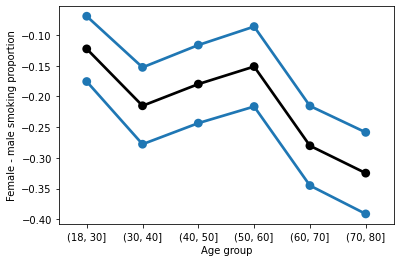

In [60]:
# Calculate the smoking rates within age/gender groups
da["agegrp"] = pd.cut(da.RIDAGEYR, [18, 30, 40, 50, 60, 70, 80])
pr = da.groupby(["agegrp", "RIAGENDRx"]).agg({"SMQ020x": lambda x: np.mean(x=="Yes")}).unstack()
pr.columns = ["Female", "Male"]

# The number of people for each calculated proportion
dn = da.groupby(["agegrp", "RIAGENDRx"]).agg({"SMQ020x": np.size}).unstack()
dn.columns = ["Female", "Male"]

# Standard errors for each proportion
se = np.sqrt(pr * (1 - pr) / dn)

# Standard error for the difference in female/male smoking rates in every age band
se_diff = np.sqrt(se.Female**2 + se.Male**2)

# Standard errors for the difference in smoking rates between genders, within age bands

# The difference in smoking rates between genders
pq = pr.Female - pr.Male

x = np.arange(pq.size)
pp = sns.pointplot(x, pq.values, color='black')
sns.pointplot(x, pq - 2*se_diff)
sns.pointplot(x, pq + 2*se_diff)
pp.set_xticklabels(pq.index)
pp.set_xlabel("Age group")
pp.set_ylabel("Female - male smoking proportion")

The plot above shows for each age band, the point estimate of the difference in smoking rates between genders (black dot), and the lower and upper end points of the 95% confidence interval (blue points).  Based on this plot, we see that in the United States, smoking is more common in men than in women, not just overall, but also in every one of the age bands.  The difference is largest for older people -- for people older than 60, the smoking rate for males is around 30 percentage points greater than the smoking rate for females, while for people younger than 30, the smoking rate for males is only around 15 percentage points greater than the smoking rate for females.

Also note that the 95% confidence bands shown above are much wider than the 95% confidence intervals for the data that were not stratified by age.  Stratifying by age leads to smaller sample sizes, which in turn results in wider confidence intervals.

## Confidence intervals for the mean

In this section, we discuss how to construct confidence intervals for the mean.  First note that the proportion discussed above is also a mean -- for example, if the data are 0, 1, 0, then the mean is 1/3, which is also the proportion of 1's in the data.  However the proportion has the special property that the variance is completely determined by the mean. That is why we constructed the standard errors for the sample proportion above using p•(1 - p) as the variance.  In general, the variance of quantitative data will not be a function of the mean, as this is a very special property of binary data.  Therefore, in general we must estimate the variance as a separate step after estimating the mean. 

To illustrate the construction of confidence intervals for the population mean of a quantitative variable, we will use the body mass inde (BMI) data from NHANES.  To begin, we calculate the mean BMI for all women and for all men in the NHANES sample.

In [61]:
da.groupby("RIAGENDRx").agg({"BMXBMI": np.mean})

,BMXBMI
RIAGENDRx,
Female,29.939946
Male,28.778072


The numbers in the first column of the table above are estimates of the population mean BMI for all women and for all men in the United States (the population that the NHANES study represents). As with the sample proportions, these numbers are not exactly equal to the mean BMI for all women and men, they are only estimates.  To establish the uncertainty for these estimates, we can use the standard errors for these two estimated means.

The standard error for the mean based on an independent and identically distributed sample is equal to the standard deviation of the variable divided by the square root of the sample size.  We next calculate all the relevant values needed to compute the standard error. 

In [62]:
da.groupby("RIAGENDRx").agg({"BMXBMI": [np.mean, np.std, np.size]})

BMXBMI                  
                mean       std    size
RIAGENDRx                             
Female     29.939946  7.753319  2976.0
Male       28.778072  6.252568  2759.0

We can now calculate the standard error of the mean BMI for women and for men:

In [63]:
sem_female = 7.753 / np.sqrt(2976)
sem_male = 6.253 / np.sqrt(2759)
print(sem_female, sem_male)

0.14211938534506902 0.119045388988243


We see that the sample mean BMI for women is expected to be off by around 0.14 relative to the population mean BMI for women, and the sample mean BMI for men is expected to be off by around 0.12 relative to the population mean BMI for men.

The standard error of the mean for women is slightly larger for women than for men.  The reason for this is that even though the NHANES sample size for women is slightly larger than that for men, the data for women appears to be more spread out.  The greater standard deviation for the female BMI values leads in turn to less precision when estimating the population mean BMI for females. 

As was the case for proportions, the 95% confidence interval for the mean can be calculated by taking the estimate plus and minus 2 (or 1.96) times the standard error.  The 95% confidence interval for female BMI is thus calculated as follows:

In [64]:
lcb_female = 29.94 - 1.96 * 7.753 / np.sqrt(2976)
ucb_female = 29.94 + 1.96 * 7.753 / np.sqrt(2976)
print(lcb_female, ucb_female)

29.661446004723665 30.218553995276338


Below we show how the one-sample confidence interval can be calculated using Statsmodels.  The numbers differ slightly
due to rounding in the calculation above.  The result below is more exact.

In [65]:
female_bmi = da.loc[da.RIAGENDRx=="Female", "BMXBMI"].dropna()
sm.stats.DescrStatsW(female_bmi).zconfint_mean()

(29.659875498090155, 30.22001580625768)